<a href="https://colab.research.google.com/github/NikoletaPantelidou/NLP-Assignments/blob/main/Exericise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import the texts in two languages
#Lyrics_en is a song in the English version while lyrics_gr is the Greek.

import urllib.request                                                     #for opening/reading URLs
lyrics_url_en = 'https://raw.githubusercontent.com/NikoletaPantelidou/NLP-Assignments/refs/heads/main/lyrics_en.txt'#URL of lyrics we want to read in
lyrics_en = urllib.request.urlopen(lyrics_url_en)                         #open URL of the English book as "lyrics_en"
lyrics_en = lyrics_en.read()                                              #returns all bytes from "lyrics_en"
lyrics_en = lyrics_en.decode("utf-8")                                     #decode as UTF-8

lyrics_url_gr = 'https://raw.githubusercontent.com/NikoletaPantelidou/NLP-Assignments/refs/heads/main/lyrics_gr.txt' #URL of lyrics we want to read in
lyrics_gr = urllib.request.urlopen(lyrics_url_gr)                        #open URL of the Greek lyrics  as "lyrics_gr"
lyrics_gr = lyrics_gr.read()                                             #returns all bytes from "lyrics_gr"
lyrics_gr = lyrics_gr.decode("utf-8")                                    #decode as UTF-8




In [12]:
#import the libraries
import spacy
import en_core_web_sm                                 #import package for the English text
nlp =spacy.load("en_core_web_sm")                     #load the English package in a variable called nlp

doc = nlp(lyrics_en)                                  #Pass the English song to the nlp pipelines in a variable called doc

!python -m spacy download el_core_news_sm             #Download the package for the Greek language
nlp = spacy.load("el_core_news_sm")                   #load the Greek package in a variable called nlp
doc = nlp(lyrics_gr)                                  #Pass the Greek song to the nlp pipelines in a variable called doc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 59.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
#Tokenize and clean the texts from stopwords, punctuation marks, blank spaces (GR)
doc = nlp(lyrics_gr)
tokens_gr = [
    token.text for token in doc                                          #I iterate through my doc using a for loop
    if not token.is_stop and not token.is_punct and token.text.strip() ] #Tokens must not belong neither to stopwords not to punctuation makrs and also strip() cleans from blank spaces
print("Tokens:", tokens_gr)




Tokens: ['Lyrics', 'Βρεγμένα', 'χαρτιά', 'λόγια', 'πνιγμένα', 'έρωτα', 'μαύρο', 'βυθό', 'λέω', 'γράφτηκαν', 'μένα', 'μπορέσω', 'περάσω', 'κι', 'νοιάζουν', 'σένα', 'μοιάζουν', 'επικίνδυνο', 'αρνηθώ', 'κάνω', 'θέλω', 'αποφασίσω', 'ντυθώ', 'βγω', 'πιστεύω', 'πονάει', 'αγάπη', 'νύχτα', 'μέση', 'κόσμου', 'λουλούδι', 'ανθισμένο', 'Πονάει', 'αγάπη', 'Παρηγοριά', 'ελπίδα', 'περιμένω', 'Κι', 'νύχτα', 'Λουλούδι', 'δρόμου', 'σένα', 'κομμένο', 'Πονάει', 'αγάπη', 'Παρηγοριά', 'ελπίδα', 'περιμένω', 'Σα', 'λουλούδι', 'ανθισμένο', 'αγάπη', 'κομμένο', 'Αθόρυβα', 'νικάει', 'χρόνος', 'επικύνδινα', 'μείνω', 'σπίτι', 'δρόμος', 'μπορέσω', 'περάσω', 'ρίχνουν', 'δείχνουν', 'ανώφελο', 'αρνηθώ', 'κάνω', 'θέλω', "θ'", 'αποφασίσω', 'ξεχάσω', 'κι', 'είπες', 'νύχτα', 'πονάει', 'αγάπη', 'νύχτα', 'μέση', 'κόσμου', 'λουλούδι', 'ανθισμένο', 'Πονάει', 'αγάπη', 'Παρηγοριά', 'ελπίδα', 'περιμένω', 'Κι', 'νύχτα', 'Λουλούδι', 'δρόμου', 'κομμένο', 'Πονάει', 'αγάπη', 'Κι', 'Παρηγοριά', 'κι', 'ελπίδα', 'περιμένω', 'λουλούδι', '

In [14]:
#Tokenize and clean the texts from stopwords, punctuation marks, blank spaces (EN)-
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
!python -m spacy download en_core_web_lg                #We downloaded the large package because the stopwords are not detected for some reason
nlp = spacy.load('en_core_web_lg')                      #We loaded the large package in a variable called nlp


# Clean the text using regex: remove unnecessary words and numbers
cleaned_text = re.sub(r'\b(oh|yeah|woah|ayy|ooh|ho|uh|intro|outro)\b|\b\d+', ' ', lyrics_en, flags=re.IGNORECASE)
cleaned_text = ' '.join(cleaned_text.split())  # Normalize spaces and convert to lowercase

# Pass the cleaned text to the nlp pipeline
doc_en = nlp(cleaned_text)

# Filter tokens: remove stop words, punctuation, and empty spaces
tokens_en = [
    token.text for token in doc_en
    if not token.is_stop and not token.is_punct and token.text.strip() and token.text.lower()
]

# Print the filtered tokens
print("Tokens after filtering:", tokens_en)




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Tokens after filtering: ['Lyrics', 'Weeknd', 'Verse', 'Weeknd', 'Like', 'moth', 'flame', 'pull', 'pull', 'need', 'initially', 'away', 'leave', 'loyal', 'time', 'let', 'Pre', 'Chorus', 'Weeknd', "'Cause", 'like', 'good', 'makes', 'feel', 'like', 'friends', 'love', 'true', 'Chorus', 'Weeknd', 'know', 'sleeps', 'know', 'pictures', 'know', 'reasons', 'cry', 'tell', 'know', 'heart', 'lies', 'truly', 'lies', 'Verse', 'Weeknd', 'let', 'time', 'stay', 'Pre', 'Chorus', 'Weeknd', "'Cause", 'like', 'good', 'makes', 'feel', 'like', 'friends', 'love', 'true', 'Chorus', 'Weeknd', 'know', '

In [15]:
#Count word frequencies and the length of the characters of each word and map them in a dictionary (GR)

lyrics_gr_dict = {}              #I create a dictionary where I will store the words as keys and they will take as values an object that shows their length and frequency in the text

for word in tokens_gr:           #I iterate through my tokens list and I use an if statement.
  if word not in lyrics_gr_dict: #This condition makes sure that everytime a word is encountered in the tokens list it is added as new case to the dictionary only if it hasn't been added before.
        lyrics_gr_dict[word] = {"frequency": 0, "length": 0}

  lyrics_gr_dict[word]["frequency"] += 1      #Having defined the condition,if a word has been already encountered before, it increases its frequency.
  lyrics_gr_dict[word]["length"] = len(word) #The length is calculated with the len() function that takes the each word

# Sort the dictionary by frequency in descending order
sorted_gr_dict = dict(sorted(lyrics_gr_dict.items(), key=lambda item: item[1]["frequency"], reverse=True)) #I put the dictionary to the sorted function and set the reverse to True in order to appear in a descendinf order
print(sorted_gr_dict)



{'αγάπη': {'frequency': 12, 'length': 5}, 'νύχτα': {'frequency': 9, 'length': 5}, 'λουλούδι': {'frequency': 6, 'length': 8}, 'ανθισμένο': {'frequency': 6, 'length': 9}, 'Πονάει': {'frequency': 6, 'length': 6}, 'περιμένω': {'frequency': 6, 'length': 8}, 'κομμένο': {'frequency': 6, 'length': 7}, 'Παρηγοριά': {'frequency': 5, 'length': 9}, 'ελπίδα': {'frequency': 5, 'length': 6}, 'Κι': {'frequency': 5, 'length': 2}, 'κι': {'frequency': 3, 'length': 2}, 'πονάει': {'frequency': 3, 'length': 6}, 'μέση': {'frequency': 3, 'length': 4}, 'κόσμου': {'frequency': 3, 'length': 6}, 'Λουλούδι': {'frequency': 3, 'length': 8}, 'δρόμου': {'frequency': 3, 'length': 6}, 'μπορέσω': {'frequency': 2, 'length': 7}, 'περάσω': {'frequency': 2, 'length': 6}, 'σένα': {'frequency': 2, 'length': 4}, 'αρνηθώ': {'frequency': 2, 'length': 6}, 'κάνω': {'frequency': 2, 'length': 4}, 'θέλω': {'frequency': 2, 'length': 4}, 'αποφασίσω': {'frequency': 2, 'length': 9}, 'Περιμένω': {'frequency': 2, 'length': 8}, 'Lyrics': {'f

In [16]:
#Count word frequencies and the characters of each word and map them in a dictionary (EN)
from collections import Counter #Imports the Counter class from Python's collections module

word_frequencies = Counter(tokens_en) # Creates a dictionary-like object (word_frequencies) where each word in tokens_en is a key, and its value is the count of occurrences in the list.
word_info_dict = { # Creates a dictionary where each key is a word from word_frequwncies. and each value is anothe dictionty contaning.
    word: {"frequency": word_frequencies[word], "length": len(word)}
    for word in word_frequencies}

#Sort the dictionary by frequency in descending order

sorted_word_info = dict( # Starts the process of creating a new dictionary, sorted_word_info, which will store the words sorted by frequency in descending order.
    sorted( #Sorts the items of word_info_dict by their frequency.
        word_info_dict.items(),# Retrieves all the key-value pairs (words and their respective frequency/length information) from word_info_dict
        key=lambda item: item[1]["frequency"], #Defines the sorting criterion: the frequency of each word.
        reverse=True)) # Ensures that the sorting is done in descending order (from most to least frequent)
print("Sorted Word Info Dictionary by Frequency:", sorted_word_info)


Sorted Word Info Dictionary by Frequency: {'lies': {'frequency': 10, 'length': 4}, 'Weeknd': {'frequency': 8, 'length': 6}, 'know': {'frequency': 8, 'length': 4}, 'truly': {'frequency': 8, 'length': 5}, 'Chorus': {'frequency': 4, 'length': 6}, 'like': {'frequency': 4, 'length': 4}, 'Verse': {'frequency': 2, 'length': 5}, 'pull': {'frequency': 2, 'length': 4}, 'time': {'frequency': 2, 'length': 4}, 'let': {'frequency': 2, 'length': 3}, 'Pre': {'frequency': 2, 'length': 3}, "'Cause": {'frequency': 2, 'length': 6}, 'good': {'frequency': 2, 'length': 4}, 'makes': {'frequency': 2, 'length': 5}, 'feel': {'frequency': 2, 'length': 4}, 'friends': {'frequency': 2, 'length': 7}, 'love': {'frequency': 2, 'length': 4}, 'true': {'frequency': 2, 'length': 4}, 'sleeps': {'frequency': 2, 'length': 6}, 'pictures': {'frequency': 2, 'length': 8}, 'reasons': {'frequency': 2, 'length': 7}, 'cry': {'frequency': 2, 'length': 3}, 'tell': {'frequency': 2, 'length': 4}, 'heart': {'frequency': 2, 'length': 5}, '

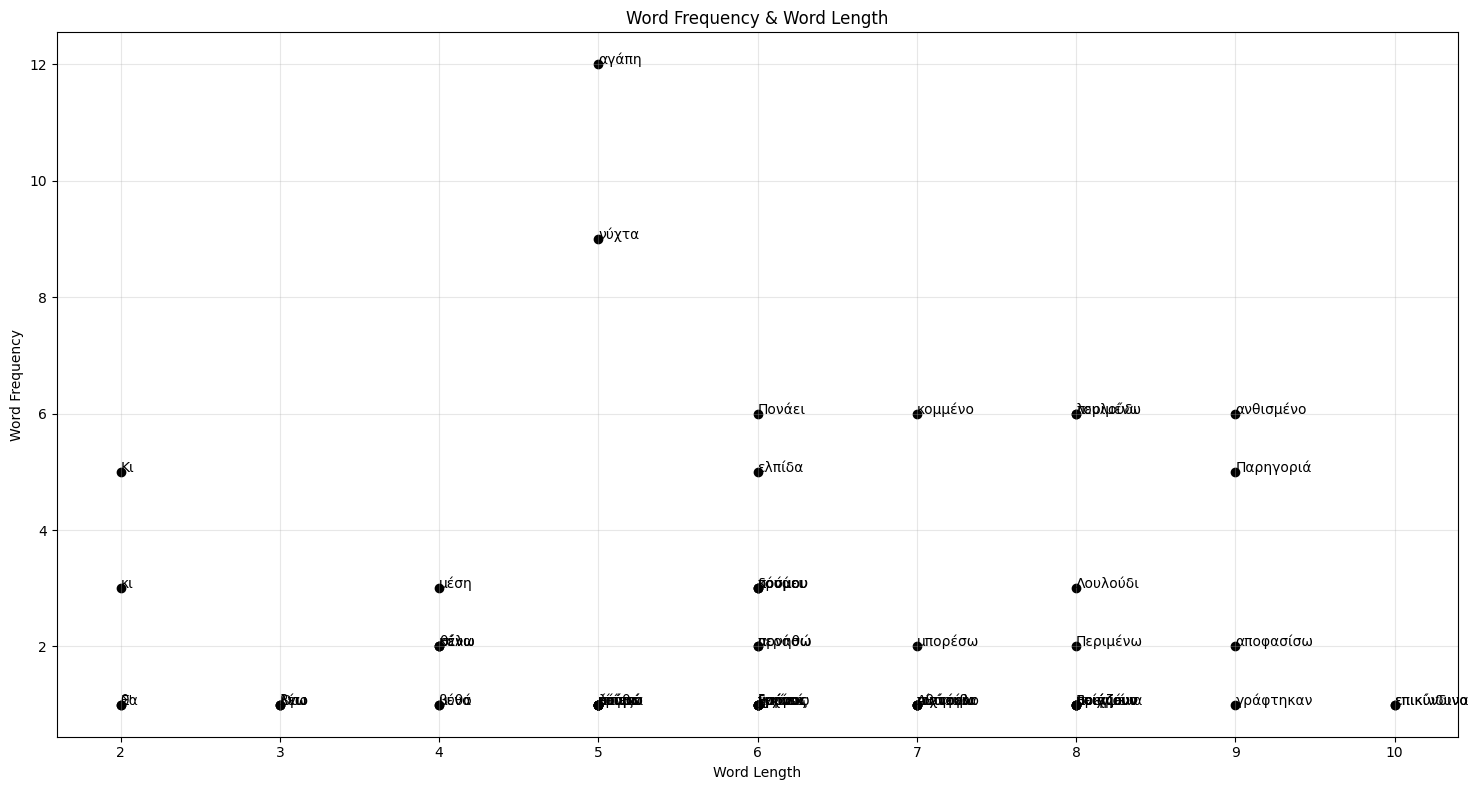

In [17]:
#Visualize the data with a graph in Greek (GR)

# Import the libraries
import matplotlib.pyplot as plt

#Define the variables that will  be used in the graph
lengths = [sorted_gr_dict[word]["length"] for word in sorted_gr_dict]  #I access the length values of my dictionary calling  the "length"  value of my words
frequencies = [sorted_gr_dict[word]["frequency"] for word in sorted_gr_dict] #I access the frequency values of my dictionary calling the "frequency" value of my words
words = list(sorted_gr_dict.keys()) #I access the words of my dictionary calling the keys since they are the keys of my dictionary


# I create a scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(lengths, frequencies, color='black')

# I annotate the words
for i, word in enumerate(words):      #I use a for loop to iterate through my words list and the enumerate function gives me the liist of the words with the words and the index
    plt.annotate(word, (lengths[i], frequencies[i]), fontsize=10) #lengths[i] and frequencies[i]give me the corresponding values for each words in the x and y axis, and word represent each string in the graph


# I add labels and titles to the graph for the x and y axis
plt.xlabel('Word Length')
plt.ylabel('Word Frequency')
plt.title('Word Frequency & Word Length')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


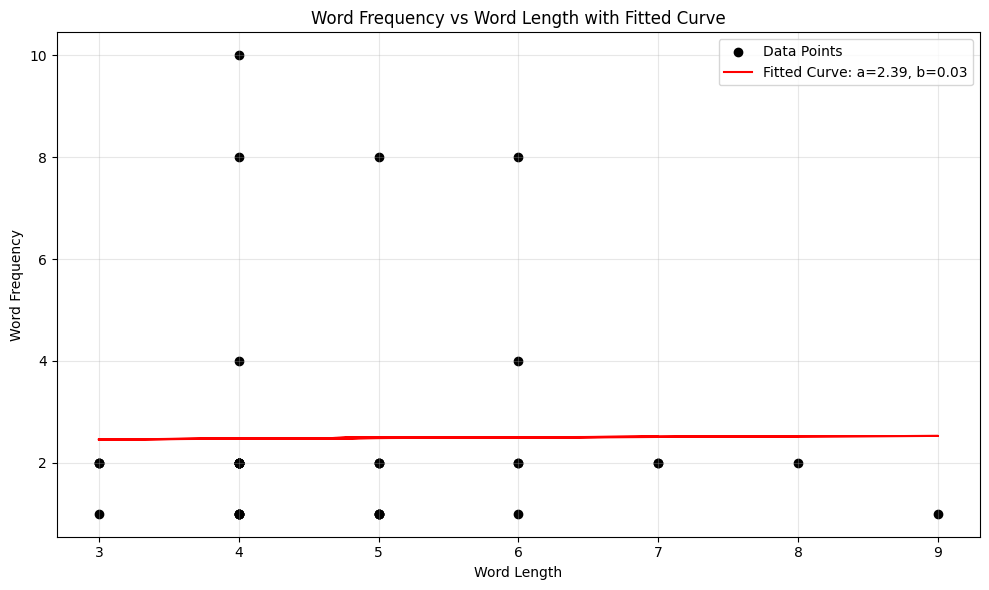

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Extract word lengths and frequencies
word_lengths = np.array([info["length"] for info in sorted_word_info.values()])
frequencies = np.array([info["frequency"] for info in sorted_word_info.values()])

# Define a function for the fitted curve (e.g., power law or exponential)
def zipf_curve(x, a, b):
    return a * np.power(x, b)

# Fit the curve using non-linear least squares
params, _ = curve_fit(zipf_curve, word_lengths, frequencies)

# Generate fitted data
fitted_frequencies = zipf_curve(word_lengths, *params)

# Plot the scatter points
plt.figure(figsize=(10, 6))
plt.scatter(word_lengths, frequencies, color='black', label='Data Points')

# Plot the fitted curve
plt.plot(word_lengths, fitted_frequencies, color='red', label=f'Fitted Curve: a={params[0]:.2f}, b={params[1]:.2f}')

# Add labels and titles
plt.xlabel('Word Length')
plt.ylabel('Word Frequency')
plt.title('Word Frequency vs Word Length with Fitted Curve')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


